In [48]:
import math
import io


In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [50]:
# here the grades column in this folder represents the weight in ounces for a keurig pod we want the mean weight to be around 5.5 ounces
cask = pd.read_csv('grades.csv')

In [51]:
cask.head()


,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


# Here we grade the measure weights for the keurig pods


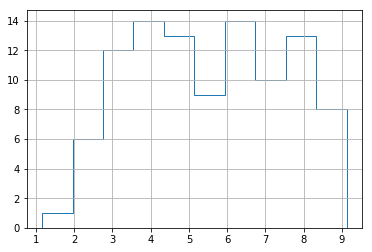

In [52]:
cask.grade.hist(histtype='step')

# Because the histogram has no recognizable distribution form we perform some discriptive statistics to show us a few metrics

In [53]:
cask.describe() # here we can see the mean is 5.6

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


# We cannot build a confidence interval by simulating the sampling distribution because we do not know how to describe it (the distribution) Given the histograms shape it is unlikly that the distribution has a simple form such as a normal distribution

# Because of this we will use boot strapping which is estimating the uncertainty of our statistic (the mean) by generating a large number of samples from the one we have

# Then we characterising the distribution of the mean over this large number of samples

In [54]:
# Here each sample in the family is prepared by drawing numbers randomly for our 
#single existing sample allowing the same number to be drawn more than once
# Technically were sampling with replacement
# here we sample 100 with replacement to give our boot strap sample giving our bootstrap mean
cask.sample(100,replace=True).describe() 

,grade
count,100.000000
mean,5.601186
std,1.919481
min,1.983167
25%,4.020809
50%,5.892076
75%,7.395195
max,8.425434


In [55]:
# Here were going to build the bootstrapped distribution of means
# we use our bootstrap sample above 
# Then take the mean & reapeat this 1000 times
# Then we fold this into a dataframe and call variable mean weight since were measuring weight of each keurig pod
# we then save everything into dataframe bootstrap
bootstrap = pd.DataFrame({'meanweight' : [cask.sample(100,replace=True).grade.mean() for i in range(1000)]})

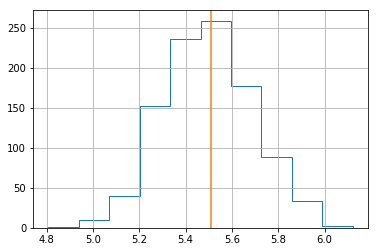

In [56]:
# Here we make histogram 
# Remember this is not the weights but the means of weights
#we then on the second line draw the orginal mean from above as a line below
bootstrap.meanweight.hist(histtype='step')
pp.axvline(cask.grade.mean(),color='C1')

# As you can see our mean is the same if you think about it, it has to be but there is significant spread around it (so lets extract the quantiles)

In [57]:
# Here we extract the quantiles
# This is the bootstraped approximated 95% confindence interval for mean weight of pods from the grade column
# we can see the 95% mean weight confidence interval is between 5.1 and 5.8
bootstrap.meanweight.quantile(0.025), bootstrap.meanweight.quantile(0.975)

(5.129419264385697, 5.8809353777696804)

## The distribution i used was actually a sum of two normal distributions with equal weights
# scipy stats will help us experiment with distributions
# here were going to make that side by side distribution used the scipystats object makes a Probability density

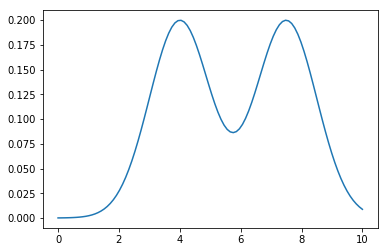

In [58]:
import scipy.stats
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

# Here we can see a bimodal distribution (it is also truncated because there cannot be weights below 0)
#  Below here were making a function to drop a single weight
# We make a scipy stats distribution object that returns a randomsample from that distribution 
# We also make a funciton to choose between the two distributions by drawing a unifor distribution number
# Between 0 and 1 and compare it with .5 and then truncate
# and continue drawing until get a sample thats acceptable 

In [59]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rsv()
        if 0 <= v <= 10:
            return v

In [60]:
draw()

6.313544748891852

# Now we make a dataset by calling this repeatedly

In [69]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

In [ ]:
for i in range(6):
    dataset(100).grade.hist(histtype='step',density=True)

In [ ]:
# sampling distribution of means layed ontop of eachother
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

In [ ]:
#comparing bootstrapped with true sampling distribution 
# this is how we justifiy our confidence interval by comparing spreads
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')